<a href="https://colab.research.google.com/github/mandrews12/health_app/blob/main/CSC310_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Overview**

According to the CDC, heart disease is a leading cause of death for people of most races in the U.S. (African Americans, American Indians and Alaska Natives, and whites). About half of all Americans (47%) have at least 1 of 3 major risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetes status, obesity (high BMI), not getting enough physical activity, or drinking too much alcohol. Identifying and preventing the factors that have the greatest impact on heart disease is very important in healthcare. In turn, developments in computing allow the application of machine learning methods to detect "patterns" in the data that can predict a patient's condition.

This dataset contains various health indicators and risk factors related to heart disease. Parameters such as age, gender, blood pressure, cholesterol levels, and exercise patterns have been collected to analyze heart disease risk and contribute to health research. The dataset can be used by healthcare professionals, researchers, and data analysts to examine trends related to heart disease, identify risk factors, and perform various health-related analyses.

---

**Data Details**

* **Age:** The individual's age.
* **Sex:** The individual's gender (Male or Female).
* **Chest Pain Type** : The individual's type of chest pain (1 - 4)
* **Resting BPs:** The individual's blood pressure (systolic).
* **Cholesterol:** The individual's total cholesterol level.
* **Fasting Blood Sugar:** The individual's fasting blood sugar > 120 mg/dl (0 - 1)
* **Resting ECG:** The individual's heart electrical activity.
* **Max Heart Rate:**: The individual's maximum achievable heart rate.
* **Exercise Angimia:** exercise induced angina.
* **Old Peak:** ST depression induced by exercise relative to rest
* **ST Slope:** the slope of the peak exercise ST segment

The target and dependent variable
* **Target:** The individual's heart disease status (Yes - 1 or No - 0).

---

**Classification**

The data set is balanced with there being 629 records for people with heart disease (1) and 561 records for poeple without heart disease (0)

---

**Description**

This data set contains 1190 records with 12 columns for each.

All variables are represented as numerical data.

---

**Preprocessing**

Preprocessing of the model was done with there being no null values but there were duplicate rows. The duplicate rows were dropped.

This led to a data set with 918 rows and 12 columns.

---

**Source**

https://www.kaggle.com/datasets/data855/heart-disease

# Body

## Exploritory Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
heart_disease = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
heart_disease

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
heart_disease.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


In [ ]:
heart_disease.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
heart_disease['target'].value_counts()

,count
target,
1,629
0,561


In [ ]:
heart_disease.duplicated().sum()

np.int64(272)

In [ ]:
heart_disease.isnull().sum(axis=0)

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
heart_disease.drop_duplicates()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

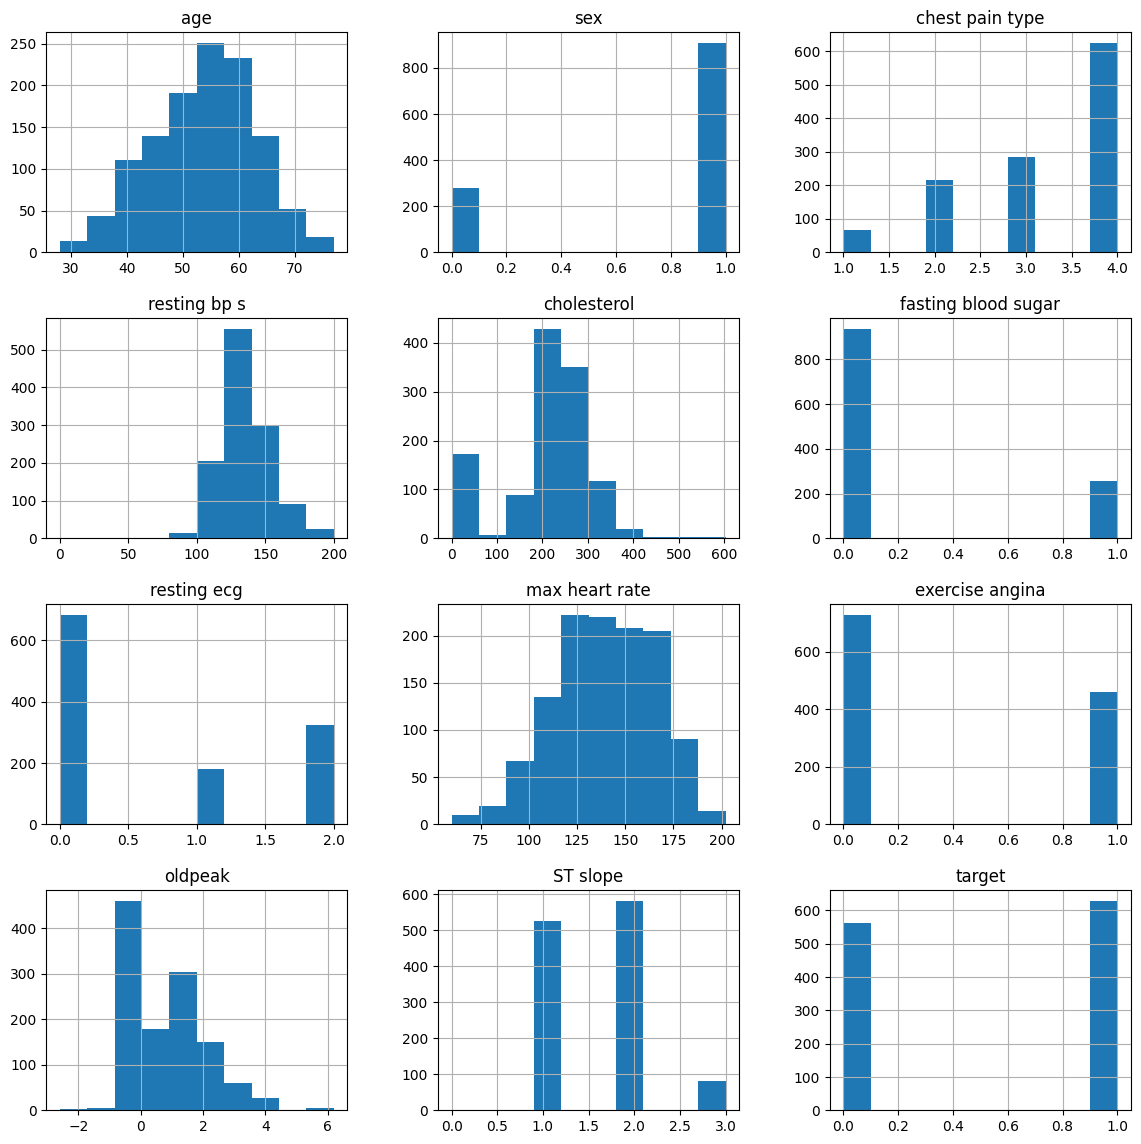

In [ ]:
heart_disease.hist(figsize=(14,14))

In [ ]:
heart_disease.skew()

,0
age,-0.192111
sex,-1.244149
chest pain type,-0.885643
resting bp s,0.293462
cholesterol,-0.781646
fasting blood sugar,1.400482
resting ecg,0.624628
max heart rate,-0.233098
exercise angina,0.462880
oldpeak,1.094006


Age, Sex, Chest Pain Type, Resting BPs, Cholesterol, Fasting Blood Sugar, Resting ECG, Max HR, Exercise Angina, and Old Peak are unimodel as they all have one peak. ST Slope and Target are multimodel as they all have more than one peak.

Age, Sex, Chest Pain Type, Cholesterol, Max HR and Target are all right skewed while Resting BPs, Fasting Blood Sugar, Resting ECG, Exercise Angina, Old Peak, and ST Slope are left skewed.

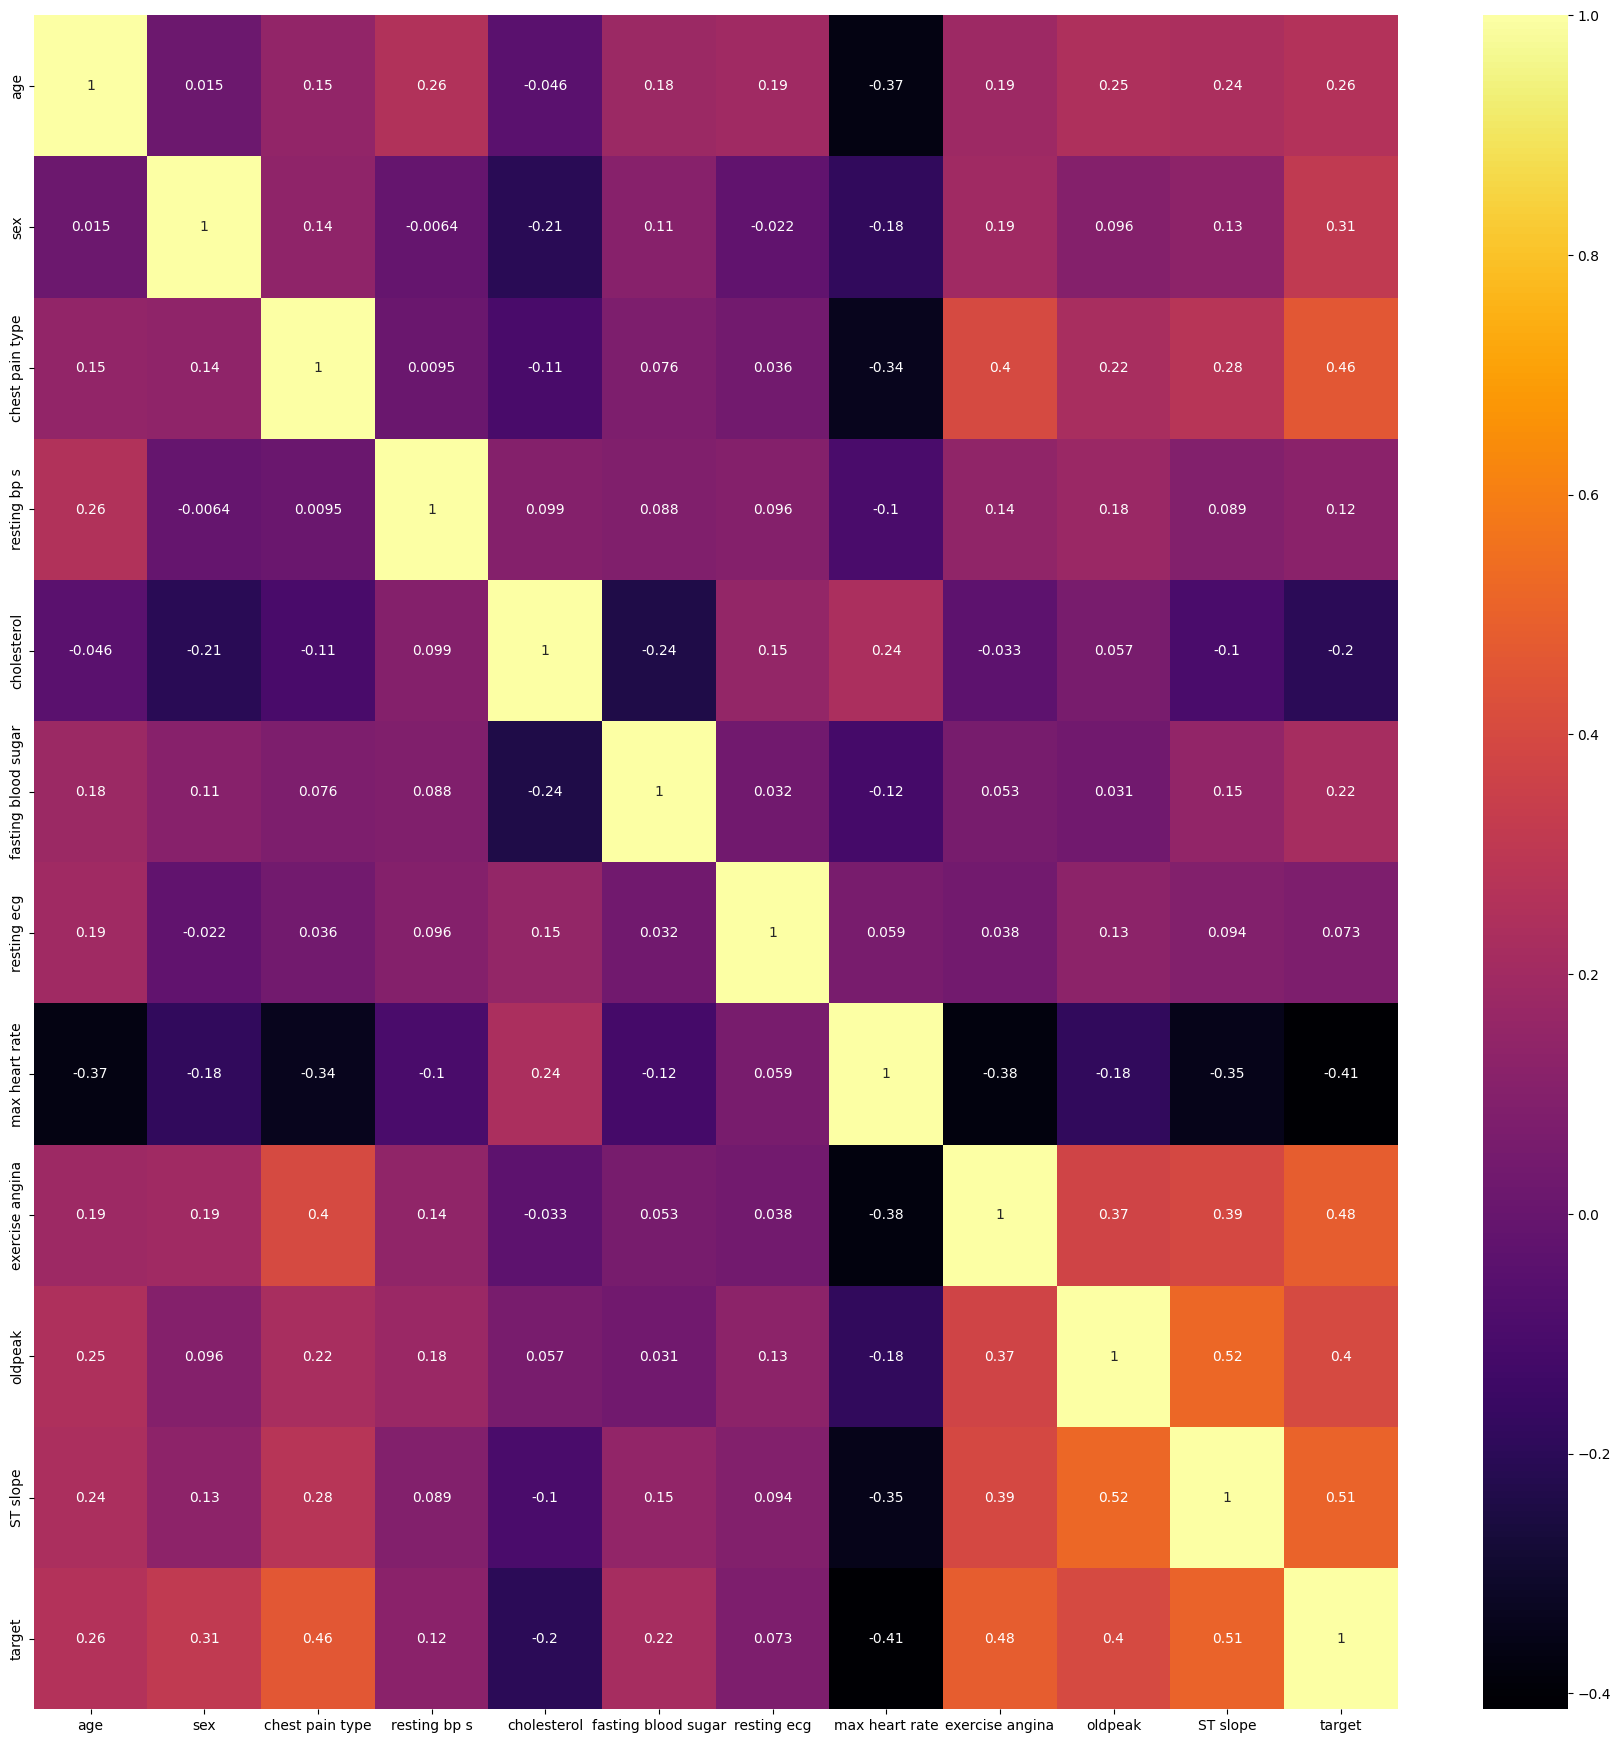

In [ ]:
import seaborn as sns
plt.figure(figsize=(22,22))
sns.heatmap(heart_disease.corr(), annot=True, cmap='inferno');

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


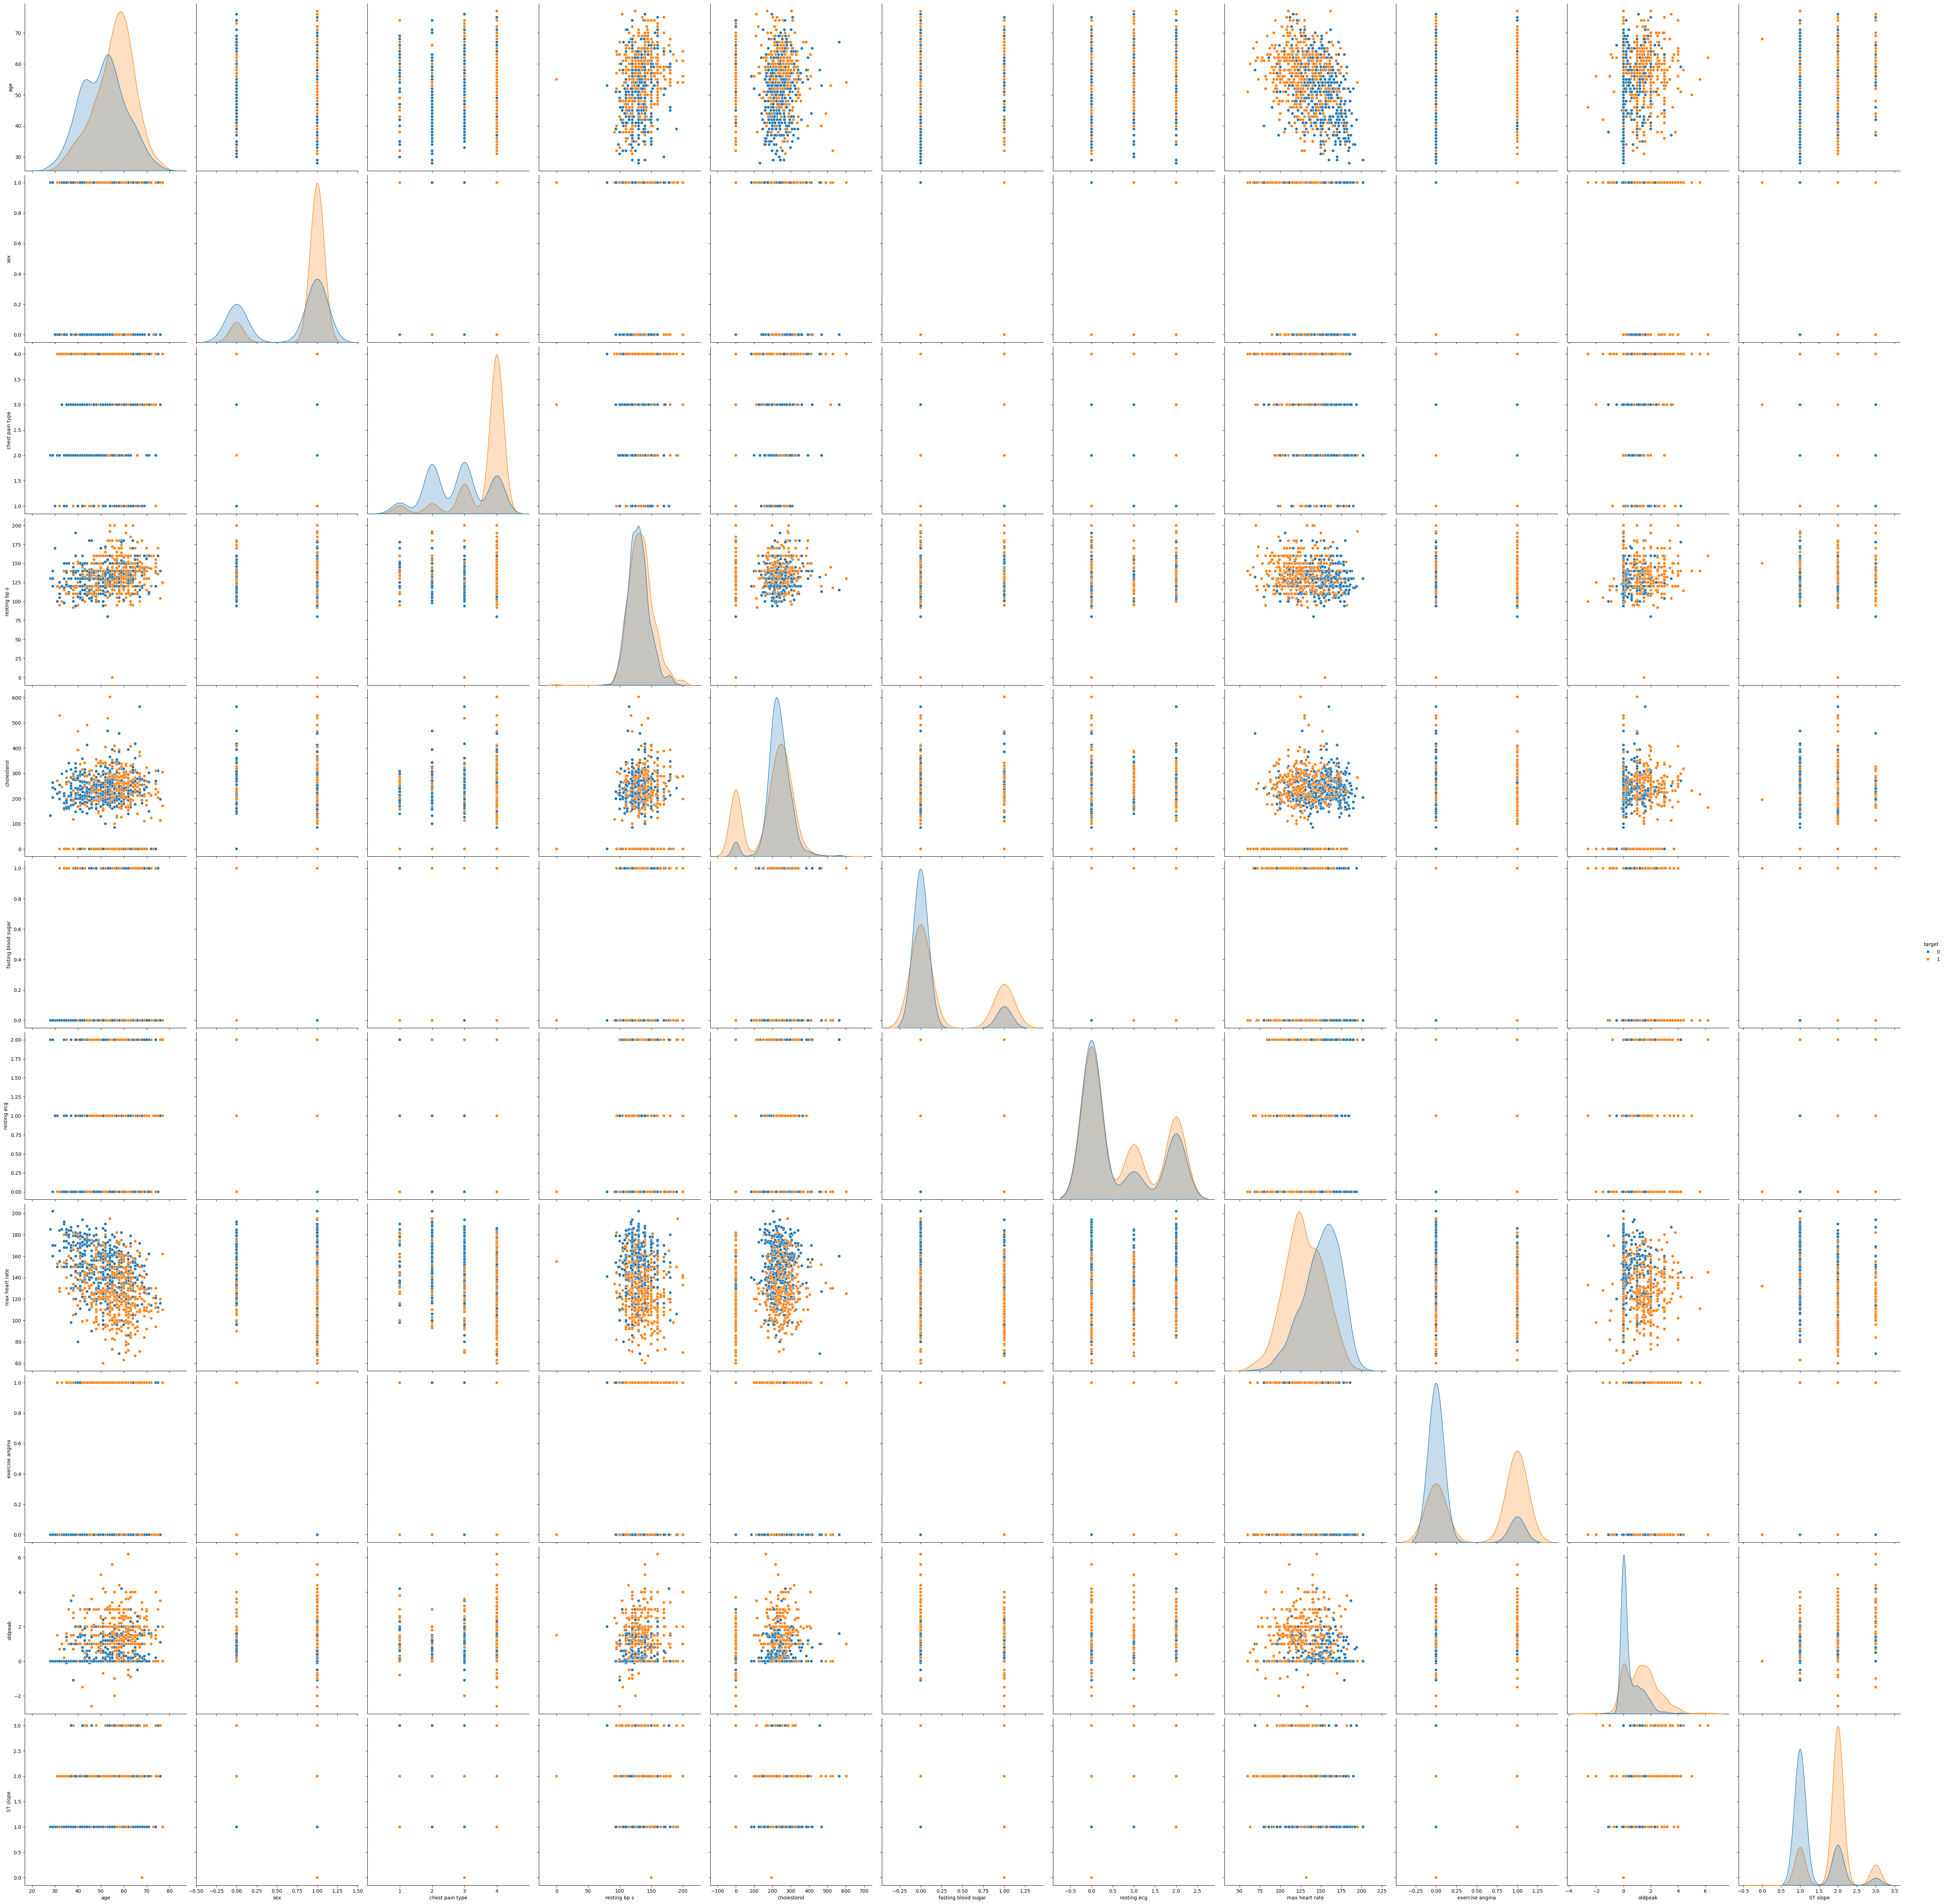

In [ ]:
sns.pairplot(heart_disease,hue='target',size=5)

The Scatter Matrix and Heatmap shows the relationship between the variables:

A greater age correlates to a lower maximum heart rate and a higher blood pressure.

People with a lower maximum heart rate are more prone to heart disease.

People with chest pain type 4 are more at risk of heart diease.

People with a lower ST slope are more prone to heart disease.

Poeple who experience exercise angimia are more prone to heart disease.




**Hypothesis**

Based on my exploritory analysis, it seems heart disease risk does not have one main determining factor but rather there are multiple factors that contribute to an individual having heart deisease or not. I hypothesis that the main contributers to an individual having heart diesease are having a lower max heart rate, type 4 chest pain, a hight ST slope and the presense of exercise angimia.

## Predictive Analysis